In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [44]:
data=pd.read_csv("https://raw.githubusercontent.com/campusx-official/fastapi-demo-api/refs/heads/main/insurance.csv")
data.sample(5)

,age,weight,height,income_lpa,smoker,city,occupation,insurance_premium_category
48,36,94.8,1.66,32.69,True,Chennai,unemployed,Medium
32,47,113.7,1.90,50.00,False,Jalandhar,private_job,Medium
22,57,106.4,1.83,30.00,False,Chandigarh,government_job,Low
24,50,54.2,1.66,18.60,False,Mysore,private_job,Medium
67,22,56.4,1.82,2.76,False,Jaipur,student,Low


In [45]:
data['bmi']=data["weight"]/data["height"]**2
data.head(5)

,age,weight,height,income_lpa,smoker,city,occupation,insurance_premium_category,bmi
0,67,119.8,1.56,2.92,False,Jaipur,retired,High,49.227482
1,36,101.1,1.83,34.28,False,Chennai,freelancer,Low,30.189017
2,39,56.8,1.64,36.64,False,Indore,freelancer,Low,21.118382
3,22,109.4,1.55,3.34,True,Mumbai,student,Medium,45.535900
4,69,62.2,1.60,3.94,True,Indore,retired,High,24.296875


In [46]:
data.drop(columns=['height','weight'],axis=1,inplace=True)
data.head(5)

,age,income_lpa,smoker,city,occupation,insurance_premium_category,bmi
0,67,2.92,False,Jaipur,retired,High,49.227482
1,36,34.28,False,Chennai,freelancer,Low,30.189017
2,39,36.64,False,Indore,freelancer,Low,21.118382
3,22,3.34,True,Mumbai,student,Medium,45.535900
4,69,3.94,True,Indore,retired,High,24.296875


In [47]:
bins=[0,10,23, 60, 120]
lebels=['child', 'youth', 'adult', 'senior']

data['age_level']=pd.cut(data['age'],bins=bins, labels=lebels, right=False)
data.head(5)

,age,income_lpa,smoker,city,occupation,insurance_premium_category,bmi,age_level
0,67,2.92,False,Jaipur,retired,High,49.227482,senior
1,36,34.28,False,Chennai,freelancer,Low,30.189017,adult
2,39,36.64,False,Indore,freelancer,Low,21.118382,adult
3,22,3.34,True,Mumbai,student,Medium,45.535900,youth
4,69,3.94,True,Indore,retired,High,24.296875,senior


In [93]:
data['occupation'].value_counts().keys()

Index(['retired', 'unemployed', 'government_job', 'student', 'freelancer',
       'business_owner', 'private_job'],
      dtype='object', name='occupation')

In [48]:
data['city'].unique()

array(['Jaipur', 'Chennai', 'Indore', 'Mumbai', 'Kota', 'Hyderabad',
       'Delhi', 'Chandigarh', 'Pune', 'Kolkata', 'Lucknow', 'Gaya',
       'Jalandhar', 'Mysore', 'Bangalore'], dtype=object)

In [49]:
tier_1_cities = ['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune']

tier_2_cities = ['Chandigarh', 'Gaya', 'Indore', 'Jaipur', 'Jalandhar', 'Kota', 'Lucknow', 'Mysore']


In [50]:
condition=[
    data['city'].isin(tier_1_cities)
]
values=['Tier_1']

data['city_level']=np.select(condition, values,'Tier_2')

In [51]:
data.sample(10)

,age,income_lpa,smoker,city,occupation,insurance_premium_category,bmi,age_level,city_level
79,39,30.000000,True,Indore,government_job,Low,22.723537,adult,Tier_2
67,22,2.760000,False,Jaipur,student,Low,17.026929,youth,Tier_2
56,24,2.860000,True,Kolkata,student,Medium,42.414152,adult,Tier_1
34,75,0.680000,True,Kota,retired,High,32.914286,senior,Tier_2
55,47,24.930000,False,Delhi,unemployed,Low,25.293194,adult,Tier_1
77,67,0.610000,True,Mumbai,retired,High,37.818734,senior,Tier_1
18,52,38.140000,True,Kota,business_owner,High,24.969136,adult,Tier_2
72,70,3.080000,False,Indore,retired,High,35.499527,senior,Tier_2
91,38,28.467885,False,Bangalore,government_job,Low,38.675103,adult,Tier_1
57,72,1.360000,True,Jalandhar,retired,High,26.889815,senior,Tier_2


In [52]:
# for i in range(len(data)):
#     if data.loc[i,'city'] in tier_1_cities:
#         data.loc[i,'city_tier']='first'
#     elif data.loc[i,'city'] in tier_2_cities:
#         data.loc[i,'city_tier']='second'

In [53]:
condition=[
    (data['bmi']>=30) & (data['smoker']==True) & (data['age_level']=='senior'),
    (data['bmi']>=30) & (data['smoker']==True) & (data['age_level']=='adult'),
    (data['bmi']>25) & (data['bmi']<30) & (data['smoker']==True) &(data['age_level']=='adult'),
    (data['bmi']>=30) & (data['smoker']==False) & (data['age_level']=='senior'),

]
values=['serious', 'medium', 'mild', 'little_risk']
data['health_condition']=np.select(condition,values,default= 'no_issue' )

In [54]:
data.sample(10)

,age,income_lpa,smoker,city,occupation,insurance_premium_category,bmi,age_level,city_level,health_condition
28,38,11.63000,False,Mumbai,unemployed,Low,31.584532,adult,Tier_1,no_issue
35,59,43.28000,True,Chandigarh,private_job,Medium,20.762578,adult,Tier_2,no_issue
6,19,3.59000,True,Hyderabad,student,Medium,28.380102,youth,Tier_1,no_issue
88,54,30.00000,False,Mumbai,government_job,Low,31.443698,adult,Tier_1,no_issue
34,75,0.68000,True,Kota,retired,High,32.914286,senior,Tier_2,serious
9,58,43.07000,False,Pune,business_owner,Low,24.858833,adult,Tier_1,no_issue
58,72,3.31000,True,Indore,retired,High,29.930402,senior,Tier_2,no_issue
67,22,2.76000,False,Jaipur,student,Low,17.026929,youth,Tier_2,no_issue
39,51,11.99000,True,Bangalore,unemployed,High,35.643424,adult,Tier_1,medium
87,30,25.59837,False,Hyderabad,government_job,Low,32.031250,adult,Tier_1,no_issue


In [55]:
# for i in range(len(data['smoker'])):
#     if data['smoker'].loc[i]== True:
#         if data['bmi'].loc[i]>=25 and data['age_level'].iloc[i]=='senior':
#             data['health_risk'].loc[i]='high'
#         elif data['age_level'].iloc[i]=='adult':
#             data['health_risk'].loc[i]='medium'
    

In [56]:
data.columns

Index(['age', 'income_lpa', 'smoker', 'city', 'occupation',
       'insurance_premium_category', 'bmi', 'age_level', 'city_level',
       'health_condition'],
      dtype='object')

In [57]:
data.drop(columns=['age','city','smoker'],axis=1,inplace=True)

In [58]:
data.sample(10)

,income_lpa,occupation,insurance_premium_category,bmi,age_level,city_level,health_condition
96,34.010000,private_job,Low,47.984483,adult,Tier_1,no_issue
94,10.542289,government_job,Low,33.266002,adult,Tier_1,no_issue
93,1.280000,student,Low,23.199416,adult,Tier_2,no_issue
73,2.220000,retired,High,32.121628,senior,Tier_1,serious
22,30.000000,government_job,Low,31.771627,adult,Tier_2,no_issue
3,3.340000,student,Medium,45.535900,youth,Tier_1,no_issue
16,0.610000,retired,Medium,27.767889,senior,Tier_1,no_issue
82,12.960000,unemployed,Low,17.874812,adult,Tier_1,no_issue
31,11.770000,private_job,Medium,15.258742,adult,Tier_2,no_issue
44,50.000000,private_job,Medium,30.078125,adult,Tier_2,medium


In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [60]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [61]:
data.head(5)

,income_lpa,occupation,insurance_premium_category,bmi,age_level,city_level,health_condition
0,2.92,retired,High,49.227482,senior,Tier_2,little_risk
1,34.28,freelancer,Low,30.189017,adult,Tier_1,no_issue
2,36.64,freelancer,Low,21.118382,adult,Tier_2,no_issue
3,3.34,student,Medium,45.535900,youth,Tier_1,no_issue
4,3.94,retired,High,24.296875,senior,Tier_2,no_issue


In [70]:
categorical_features = ["age_level","health_condition", "occupation", "city_level"]
numeric_features = ["bmi", "income_lpa"]

In [71]:
preprocess=ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

In [72]:
pipeline=Pipeline(steps=[
    ('preprocess', preprocess),
    ('classifier', DecisionTreeClassifier())
])

In [73]:
X=data.drop('insurance_premium_category',axis=1)
y=data['insurance_premium_category']

In [74]:
X.sample(10)

,income_lpa,occupation,bmi,age_level,city_level,health_condition
74,1.88,retired,29.979760,senior,Tier_2,no_issue
89,4.00,student,30.458274,adult,Tier_1,no_issue
92,30.00,government_job,18.319942,adult,Tier_2,no_issue
59,1.13,retired,35.835044,senior,Tier_2,little_risk
95,19.64,business_owner,21.420747,adult,Tier_2,no_issue
38,1.84,retired,33.204933,senior,Tier_2,serious
36,0.53,retired,21.713266,senior,Tier_1,no_issue
97,44.86,freelancer,18.765432,adult,Tier_1,no_issue
44,50.00,private_job,30.078125,adult,Tier_2,medium
1,34.28,freelancer,30.189017,adult,Tier_1,no_issue


In [83]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42)

In [84]:
X_train.sample(10)

,income_lpa,occupation,bmi,age_level,city_level,health_condition
56,2.86,student,42.414152,adult,Tier_1,medium
28,11.63,unemployed,31.584532,adult,Tier_1,no_issue
6,3.59,student,28.380102,youth,Tier_1,no_issue
2,36.64,freelancer,21.118382,adult,Tier_2,no_issue
49,2.29,student,42.701490,adult,Tier_2,no_issue
25,30.00,government_job,25.057232,adult,Tier_2,no_issue
9,43.07,business_owner,24.858833,adult,Tier_1,no_issue
46,25.57,unemployed,33.672766,adult,Tier_1,medium
81,22.19,freelancer,31.866055,adult,Tier_2,medium
72,3.08,retired,35.499527,senior,Tier_2,little_risk


In [85]:
pipeline.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [87]:
y_pred=pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.52
Confusion Matrix:
 [[5 1 6]
 [0 4 2]
 [1 2 4]]


Text(0.5, 1.0, 'Confusion Matrix')

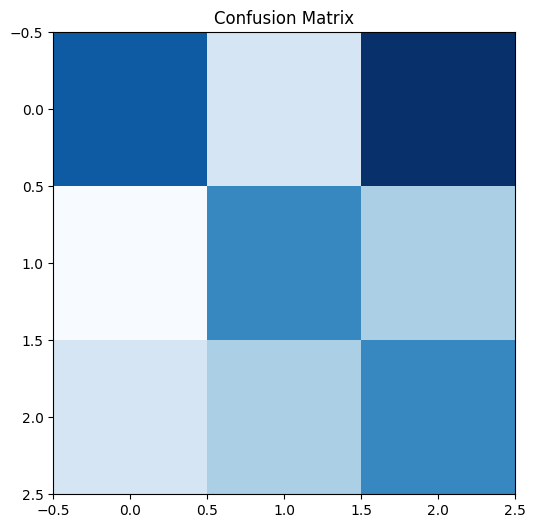

In [88]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')

In [89]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(pipeline,f)